# Exploratory analysis of CIFAR-10 dataset

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

/Users/mercedeszlehoczky/Downloads/DSToolkits/testenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Display a sample of the images

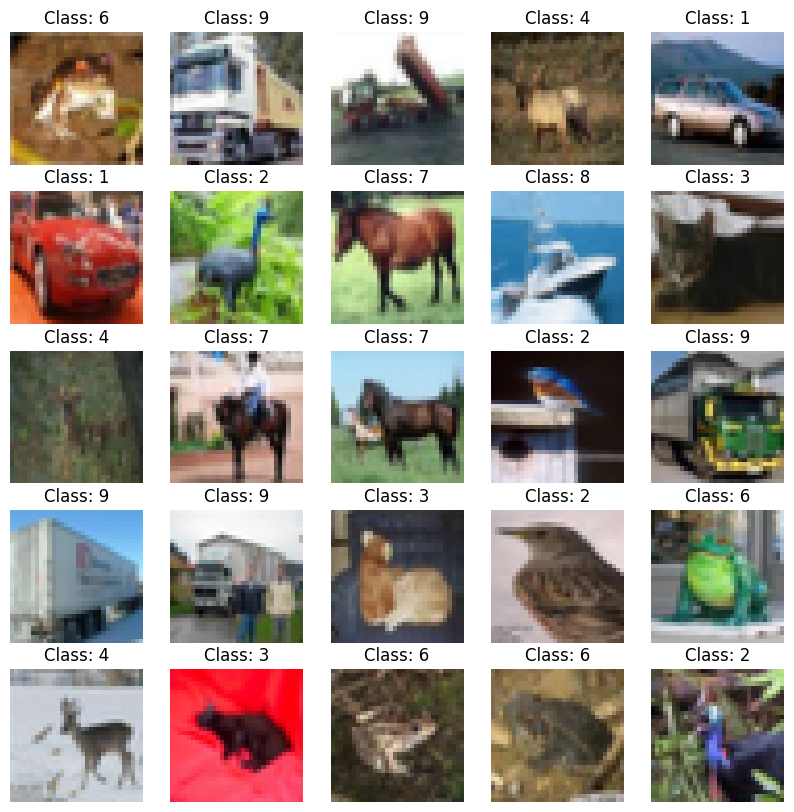

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
plt.show()

## Describe the dataset

In [8]:
print(f"Number of training examples: {len(x_train)}")
print(f"Number of test examples: {len(x_test)}")
print(f"Image shape: {x_train[0].shape}")
print(f"Unique labels: {np.unique(y_train)}")

Number of training examples: 50000
Number of test examples: 10000
Image shape: (32, 32, 3)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


The CIFAR-10 dataset is comprised of ten categories. Each image is 32x32 pixels, and are RGB colored. 

Read more about the dataset here: https://www.cs.toronto.edu/~kriz/cifar.html


## View the disctibution of the classes

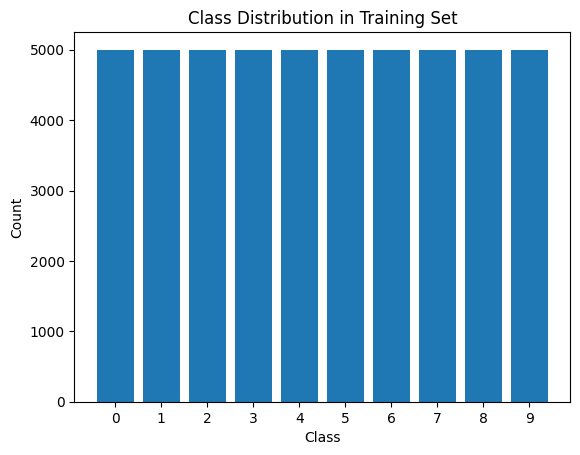

In [9]:
unique_classes, class_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Each class are represented eaqually in the datase.

## Histograms of the colored channels

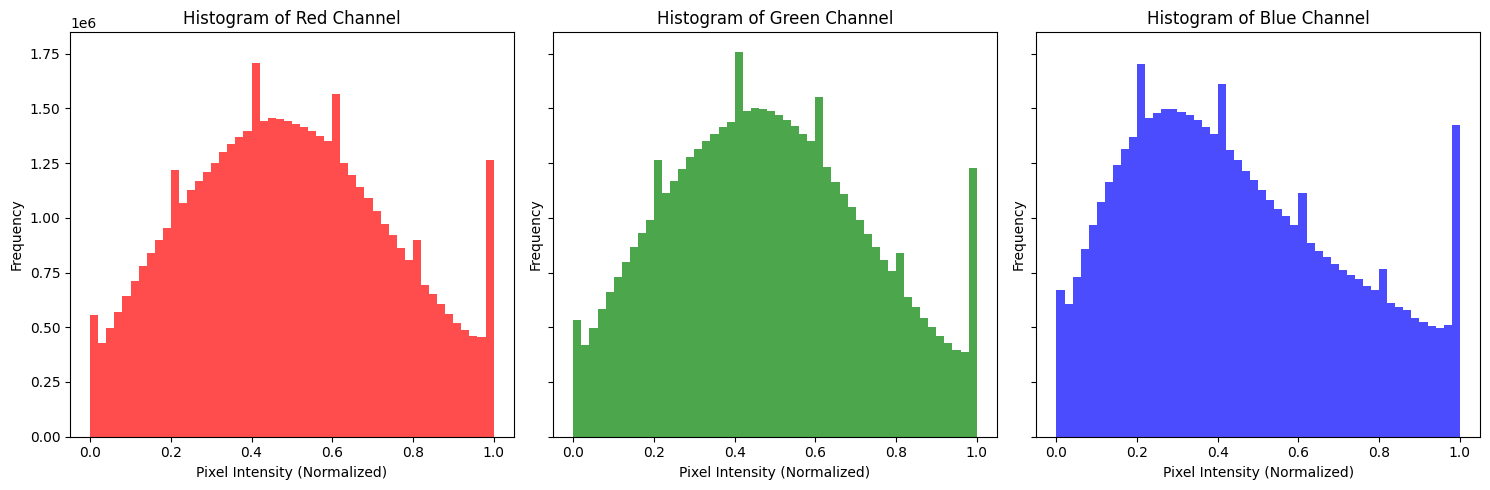

In [10]:
# Display histograms for each color channel
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, color in enumerate(['Red', 'Green', 'Blue']):
    # Flatten the color channel and normalize values
    channel_values = x_train[:, :, :, i].flatten() / 255.0
    
    axes[i].hist(channel_values, bins=50, color=color.lower(), alpha=0.7)
    axes[i].set_title(f'Histogram of {color} Channel')
    axes[i].set_xlabel('Pixel Intensity (Normalized)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Each channel has similar distribution of the colors. The blue is slightly more right-skewed than the others.